In [3]:
import scipy.io as sio
import numpy as np
import yaml

with open('./util/config__drama_data.yaml', 'r') as f_yml:
    config = yaml.safe_load(f_yml)

from util import util_dataload as udl
from util import util_ridge as uridge

%matplotlib inline
import matplotlib.pyplot as plt

# (Demo) Step-by-step data loading and visualization

## Param: Setting parameters

subject_name : S01-S06<br>
featname, extension :  Setting featurename and the extension(e.g. '.pkl').<br>
movietitle : Selecting a single movie title from the above list. (e.g. 'heroes')<br>
runname : Setting run index (e.g. 'run-01')

#### Available movie titles and run indices
- bigbangtheory : run-01 ~ run-04
- breakingbad : run-01 ~ run-05
- crown : run-01 ~ run-05
- dreamgirls : run-01 ~ run-09
- gis : run-01 ~ run-04
- glee : run-01 ~ run-04
- heroes : run-01 ~ run-05
- mentalist : run-01 ~ run-04
- suits : run-01 ~ run-03

In [26]:
subject_name = 'S02'
movietitle = 'dreamgirls'
runname = 'run-08'

# option
featname = '[YOUR_FEAT]'
extension = '.pkl' # example

## Main: Data loading and visualization

(bold)/mount/nfs7/user/naoko-ko/pj_AIS_drama__openNeuro_data//derivatives/preprocessed_data/sub-S02/sub-S02_task-dreamgirlsSess2_run-03.mat
(feat)/mount/nfs7/user/naoko-ko/pj_AIS_drama__openNeuro_data//derivatives/feature/dreamgirlsSess2_run-03_[YOUR_FEAT].pkl


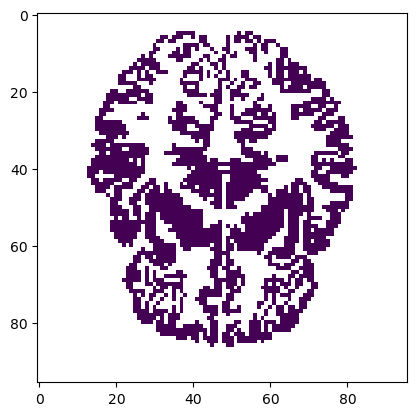

In [27]:

subjectID = udl.get_subjectID_from_subjectName(config, subject_name)
movID, runID = udl.get_movID_runID(config, movietitle, runname)

load_items = udl.set_load_items(config, subjectID=subjectID, movID=movID)
datasize = load_items['datasize']

# Get voxel indices in the cortex and sub-cortex.
mask = udl.load_mask_data(load_items['mask_path'])

# Get BOLD resp.
path_bold = load_items['list_path_resp_base'][runID].format(config['dir']['derivative'])
bold = udl.load_bold_data(path_bold)
print('(bold){:s}'.format(path_bold))

# Get the corresponding feature
path_feat = load_items['list_path_feat_base'][runID].format(config['dir']['derivative'], featname).replace('.mat', extension)
# load [YOUR_FEAT] if needed ...
print('(feat){:s}'.format(path_feat))

# Data analysis using masked data (if needed)
bold_masked = bold[:, mask] 
# {... data analysis ...}

# Prepare toy stats as the results of the analysis
toy_stats_masked = np.ones(bold_masked.shape[1])

# Reshape toy_stats to the original bold space
toy_stats = np.nan* np.ones(bold.shape[1]) # base
toy_stats[mask] = toy_stats_masked # 1D
toy_stats_3d = toy_stats.reshape(datasize[2], datasize[1], datasize[0])

# Show toy_stats (z=30)
plt.figure()
plt.imshow(toy_stats_3d[30,:,:])
plt.show()